# Details about metadata

train_df dimensions:  (9912, 14)
train_df column names:  ['Id', 'Subject Focus', 'Eyes', 'Face', 'Near', 'Action', 'Accessory', 'Group', 'Collage', 'Human', 'Occlusion', 'Info', 'Blur', 'Pawpularity']

test_df dimensions:  (8, 13)
test_df column names:  ['Id', 'Subject Focus', 'Eyes', 'Face', 'Near', 'Action', 'Accessory', 'Group', 'Collage', 'Human', 'Occlusion', 'Info', 'Blur']

Photo Metadata
The train.csv and test.csv files contain metadata for photos in the training set and test set, respectively. Each pet photo is labeled with the value of 1 (Yes) or 0 (No) for each of the following features:

Focus - Pet stands out against uncluttered background, not too close / far.

Eyes - Both eyes are facing front or near-front, with at least 1 eye / pupil decently clear.

Face - Decently clear face, facing front or near-front.

Near - Single pet taking up significant portion of photo (roughly over 50% of photo width or height).

Action - Pet in the middle of an action (e.g., jumping).

Accessory - Accompanying physical or digital accessory / prop (i.e. toy, digital sticker), excluding collar and leash.

Group - More than 1 pet in the photo.

Collage - Digitally-retouched photo (i.e. with digital photo frame, combination of multiple photos).

Human - Human in the photo.

Occlusion - Specific undesirable objects blocking part of the pet (i.e. human, cage or fence). Note that not all blocking objects are considered occlusion.

Info - Custom-added text or labels (i.e. pet name, description).

Blur - Noticeably out of focus or noisy, especially for the pet’s eyes and face. For Blur entries, “Eyes” column is always set to 0.

# Intermediate model creating more features

feature engineering

General photo related features:
1. resolution
2. width
3. height
4. color -0/1
5. 

Specific pet related features:
1. cat/dog
2. features related with color(color temperature, hue, contrast, brightness, etc..)
3. expression
4. etc..

Learning materials about picture data processing:
1. https://www.freesion.com/article/92001355060/
2. https://www.bilibili.com/video/BV143411z7nb?p=4


# Try train_jpg[0] as an example to extract features above

In [11]:
#load in packages
import os
import pandas as pd
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import cv2

In [21]:
def cv_show(name,img):
    """
    open a photo in a window
    """
    cv2.imshow(name,img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [29]:
def cv_choose_color(tag,img):
    """
    b,g,r choice
    """
    b,g,r = cv2.split(img)
    if tag == 'b':
        return b
    elif tag == 'g':
        return g
    else:
        return r

In [4]:
#source path (where the Pawpularity contest data resides)
path = 'D:/Kaggle/PetFinder/'

#Get the image data (the .jpg data) and put it into lists of filenames
train_jpg = glob(path + "train/*.jpg")
# test_jpg = glob(path + "test/*.jpg")

# target example picture
target_jpc = train_jpg[0]

In [5]:
target_jpc

'D:/Kaggle/PetFinder/train\\0007de18844b0dbbb5e1f607da0606e0.jpg'

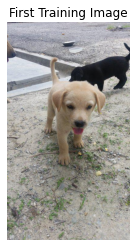

In [17]:
image_array = plt.imread(target_jpc) 
#then plt.imshow() can display it for you
plt.imshow(image_array)
plt.title('First Training Image') 
plt.axis('off') #turns off the gridlines
plt.show()

In [10]:
image  = cv2.imread(target_jpc)
print('Shape of the image is = ',image.shape)
image
# picture with color

Shape of the image is =  (720, 405, 3)


array([[[198, 184, 190],
        [201, 187, 193],
        [185, 171, 177],
        ...,
        [139, 124, 121],
        [138, 123, 120],
        [137, 122, 119]],

       [[117, 103, 109],
        [124, 110, 116],
        [119, 105, 111],
        ...,
        [195, 183, 179],
        [193, 181, 177],
        [191, 179, 175]],

       [[142, 128, 132],
        [136, 122, 126],
        [127, 113, 117],
        ...,
        [194, 182, 180],
        [191, 179, 177],
        [186, 174, 172]],

       ...,

       [[152, 151, 160],
        [150, 149, 158],
        [141, 140, 149],
        ...,
        [199, 203, 204],
        [198, 202, 203],
        [195, 199, 200]],

       [[153, 152, 161],
        [157, 156, 165],
        [145, 144, 153],
        ...,
        [191, 195, 196],
        [190, 194, 195],
        [186, 190, 191]],

       [[146, 145, 154],
        [158, 157, 166],
        [146, 145, 154],
        ...,
        [182, 186, 187],
        [183, 187, 188],
        [181, 185, 186]]

In [22]:
# image = cv2.imread(target_jpc,cv2.IMREAD_GRAYSCALE)

In [16]:
image[0].shape
# image is a matrix, and the first line is also an array which tells the details of the width and color.
# [198,184,190] represents RGB color channels for position[0,0] in the picture.

(405, 3)

## General photo related features

In [28]:
# 1.resolution,width,height 
resolution = image.size
width = image.shape[0]
height = image.shape[1]
color = image.shape[2]
print(resolution,width,height,color)

874800 720 405 3
